# Newton's Method

## overview

- derivative and gradient functions

- newton's method function

- step-by-step GUI

# New Section

References:

- Non-Linear Optimization Course: dr.h Koushki
- Autograd Github Repository : https://github.com/HIPS/autograd

  (Autograd can automatically differentiate native Python and Numpy code)
- Libraries notes.

### Approaches for Computing Derivatives

- **Symbolic differentiation:**
$f(x) = x^2 \rightarrow \frac{df(x)}{dx} = 2x$

- **Numeric differentiation:**
$$
\frac{\partial}{\partial x_i} f(x_1, \dots, x_N) = \lim_{h \to 0} \frac{f(x_1, \dots, x_i + h, \dots, x_N) - f(x_1, \dots, x_i - h, \dots, x_N)}{2h}
$$

Results are the same:

In [ ]:
import autograd.numpy as gnp
from autograd import grad
def tanh(x):
    y = gnp.exp(-x)
    return (1.0 - y) / (1.0 + y)
grad_tanh = grad(tanh)
print(grad_tanh(1.0)) #Symbolic
print((tanh(1.0001) - tanh(0.9999)) / 0.0002) #Numeric
# so grad from autograd works as intended
# we are gonna use grad function for gradiant.

0.39322386648296376
0.39322386636453377


We use symbolic differentiation for the sake of Cpu usage...I GUESS...


Now we start importing needed functions we need for basics; including matplotlib, numpy, torch and autograd and writing our own functions...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Abs as abs
%matplotlib inline
from scipy import optimize

In [ ]:
import numpy.random as npr
import torch
from autograd import grad
from sympy import symbols, hessian, Function, diff
from sympy import *

def simple_tensor_maker_2():
    x_anp = np.array([1.0, 2.0, 3.0, 4.0])
    x = torch.from_numpy(x_anp)
    x.reshape(-1, 1) + x
    return x

def graph(formula, x_range):
    a = np.array(x_range)
    y = formula.subs(x,a)
    plt.plot(a, y)
    plt.show()

def newton(f,Df,x0,epsilon,max_iter):
    xn = x0
    l=[]
    for n in range(0,max_iter):
        fxn = f.subs(x,xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn,l
        a=[xn,fxn]
        l.append(a)
        Dfxn = Df.subs(x,xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None,l
        xn = xn - fxn/Dfxn

    print('Exceeded maximum iterations. No solution found.')
    return None,l

def Convert(string):
    li = list(string.split(" "))
    li2=[]
    for i in li:
      li2.append(int(i))
    return li2


f = symbols('f', cls=Function)
g = symbols('g', cls=Function)
(x, y )= symbols('x y')
coeff=Convert(input("coefficients: "))
powers=Convert(input("powers: "))
h=int(input("reminder: "))
a=''
g=0

for i in range(len(powers)):
  f= coeff[i]*np.power(x,powers[i])
  g= g + f
g=g + h
g1 = lambdify(x, g)
#  print(g1,type(g1),g1(0),type(g1(0)))
g2 = lambdify(x, diff(g))
print(g)
print(diff(g))
#  print(g1(0))
print(g2(0))
x0s = [0.25]

for x0 in x0s:
   newton(g, diff(g), float(x0), float(0.00001),10)


coefficients: 1 2 3 4
powers: 1 2 3 4
reminder: 12
4*x**4 + 3*x**3 + 2*x**2 + x + 12
16*x**3 + 9*x**2 + 4*x + 1
1
Exceeded maximum iterations. No solution found.


1 2 3 4
1 2 3 4
4*x**4 + 3*x**3 + 2*x**2 + x
4*x**4 + 3*x**3 + 2*x**2 + x
16*x**3 + 9*x**2 + 4*x + 1
[[70 0]
 [0 0]]
Found solution after 7 iterations.
0.000287410907691124


<function matplotlib.pyplot.show>

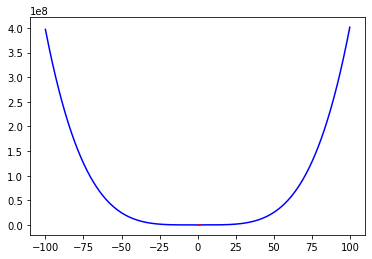

In [ ]:
from sympy import symbols, hessian, Function, diff


(x, y )= symbols('x y')
f = symbols('f', cls=Function)
g = symbols('g', cls=Function)

zarib=Convert(input(""))
powers=Convert(input(""))
a=''
g=0
for i in range(len(zarib)):
  f= zarib[i]*np.power(x,powers[i])
  g= g + f
H = hessian(g, [x, y]).subs([(x,1), (y,1)])
diff(sin(x)*exp(x), x)
print(g)
print(g)
print(diff(g))
print(np.array(H))
def newton(f,Df,x0,epsilon,max_iter):
    xn = x0
    l=[]
    for n in range(0,max_iter):
        fxn = f.subs(x,xn)
        a=[xn,fxn]
        l.append(a)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return (xn,l)
        Dfxn = Df.subs(x,xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return (None,l)
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return (None,l)
(solution,lisst)=newton(g,diff(g),1.5,0.001,120)
print(solution)
xss=[]
fx=[]
yss=[]
fy=[]
for i in lisst:
  xss.append(i[0])
  yss.append(i[1])
for i in range(-1000,1000):
  fx.append(i/10)
  fy.append(g.subs(x,i/10))
plt.plot(fx,fy,color="b")
plt.plot(xss,yss,color="r")
plt.show

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
def f(x):
    return (x**3 - 1)
root = optimize.newton(f, 1.5)
print(root)
root = optimize.newton(f, 1.5, fprime2=lambda x: 6 * x)
print(root)
root = optimize.newton(f, 1.5, fprime=lambda x: 3 * x**2)
print(root)
root = optimize.newton(f, 1.5, fprime=lambda x: 3 * x**2, fprime2=lambda x: 6 * x)
print(root)

1.0000000000000016
1.0000000000000016
1.0
1.0
